# Paleocurrent directions

This notebook applies rotations to paleocurrent trend and plunge measurements to rotate to horizontal based on bedding tilt. These rotated paleocurrent directions are then plotted on a rose diagram.

## Installing the Python package mplstereonet

If you have not previously installed mplstereonet, run the cells below to install them. This package enables the plotting of directional data on stereonet plots.

In [ ]:
!pip install mplstereonet

## Import scientific python libraries

The `rotation.py` functions that are imported are a small subset of `pmag.py` functions that enable the rotations necessary to apply tilt corrections to the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rotation as rot
import mplstereonet

## Import data

These data were collected at Point Lobos reserve within the Carmelo Formation in June, 2022 and June, 2024.

In [2]:
paleocurrent_data = pd.read_csv('./data/paleocurrent.csv')
print('number of measurements:', len(paleocurrent_data))
paleocurrent_data.tail()

number of measurements: 42


,paleocurrent_trend,paleocurrent_plunge,up_or_down,bedding_dip_direction,bedding_dip,group,note,year,Unnamed: 8,Unnamed: 9
37,104,9,up,68,17,Leah,Flame structure flow to WNW,2024,36.522104,-121.934577
38,122,7,up,82,6,Leah,Ripple flow to NW,2024,36.522226,-121.935015
39,80,31,up,19,58,Leah,Ripple flow to WSW,2024,36.512250,-121.943515
40,60,39,up,6,63,Leah,Ripple flow to SW,2024,36.512213,-121.943416
41,235,8,down,164,19,Leah,Ripple flow to SW,2024,36.513358,-121.944507


## Plot an example measurement

In [12]:
n = 2

dip_direction = paleocurrent_data.bedding_dip_direction[n]
strike = (dip_direction-90)%360
dip = paleocurrent_data['bedding_dip'][n]

trend = paleocurrent_data['paleocurrent_trend'][n]
plunge = paleocurrent_data['paleocurrent_plunge'][n]

print('bedding plane (strike/dip):', strike, '/', dip)
print('paleocurrent (trend-plunge)', trend, '-', plunge)

bedding plane (strike/dip): 285 / 57
paleocurrent (trend-plunge) 50 - 53


/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_28051/3533105135.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


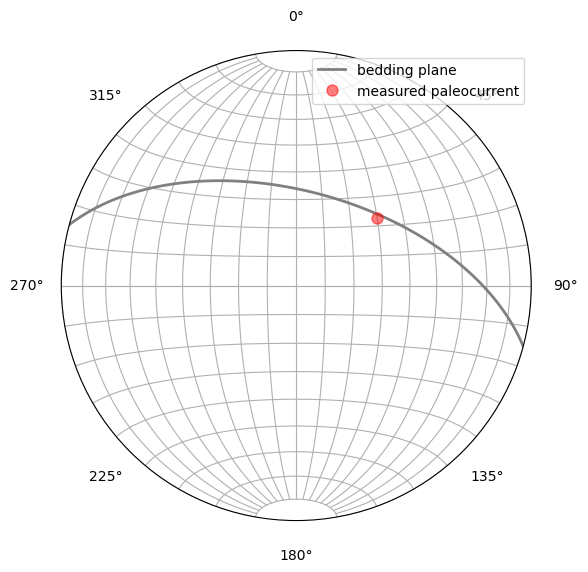

In [13]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='stereonet')

ax.plane(strike, dip, color='grey', linewidth=2, label='bedding plane')
ax.line(plunge, trend, color='red', markersize=8, alpha=0.5, label='measured paleocurrent')
ax.grid()
fig.tight_layout()
plt.legend()
plt.show()

## Correct paleocurrent measurement for bedding tilt

In [14]:
paleocurrent_trend, paleocurrent_plunge = rot.dotilt(trend,plunge,dip_direction,dip)
print('corrected paleocurrent (trend-plunge)', round(paleocurrent_trend), '-', round(paleocurrent_plunge))

corrected paleocurrent (trend-plunge) 35 - 1


/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_28051/3909596762.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


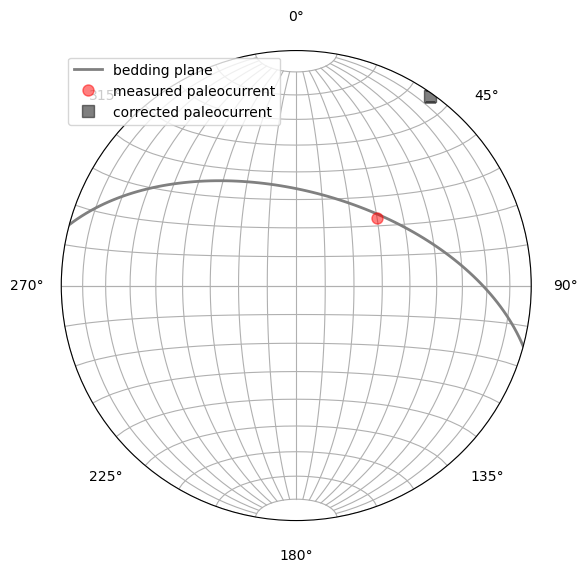

In [15]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='stereonet')

ax.plane(strike, dip, color='grey', linewidth=2, label='bedding plane')
ax.line(plunge, trend, color='red', markersize=8, alpha=0.5, label='measured paleocurrent')
ax.line(paleocurrent_plunge, paleocurrent_trend, color='black', markersize=8, alpha=0.5, marker='s', label='corrected paleocurrent')
ax.grid()
fig.tight_layout()
plt.legend()
plt.show()

## Correct all of the paleocurrents for bedding tilt

In [16]:
paleocurrents = []

for n in paleocurrent_data.index:
    if paleocurrent_data.up_or_down[n] == 'up':
        trend = (paleocurrent_data.paleocurrent_trend[n] + 180.0) % 360.0
        plunge = -paleocurrent_data.paleocurrent_plunge[n]
    elif paleocurrent_data.up_or_down[n] == 'down':
        trend = paleocurrent_data.paleocurrent_trend[n]
        plunge = paleocurrent_data.paleocurrent_plunge[n]
    dip_direction = paleocurrent_data.bedding_dip_direction[n]
    dip = paleocurrent_data.bedding_dip[n]
    paleocurrent_trend, paleocurrent_plunge = rot.dotilt(trend,plunge,dip_direction,dip)
    paleocurrents.append(paleocurrent_trend)

In [17]:
paleocurrents

[190.37354831636858,
 210.62574712093743,
 215.1980884650581,
 232.4697302926184,
 236.40838083048968,
 219.54398622872745,
 216.25142448655043,
 225.58104407211195,
 213.16884034500674,
 228.60997453691684,
 197.4841889459029,
 228.94898374535427,
 191.81098844832042,
 203.38475511349893,
 210.6900227403673,
 184.9958038587778,
 222.74864378996105,
 240.47267807235275,
 214.3481063219793,
 212.29092234045166,
 235.06910462604242,
 243.5059114208209,
 257.04535167470254,
 230.5066663670415,
 207.14849425597842,
 218.3962552261304,
 185.42158037947527,
 200.05411207311573,
 222.0310860359303,
 209.82948959381747,
 191.98297370420102,
 214.5082716626162,
 216.116958426315,
 200.011430447162,
 207.68559468119838,
 228.84014718071757,
 233.81051674830914,
 283.6342438115313,
 301.6839650479723,
 247.77045571304944,
 225.30152975705766,
 233.4962015300344]

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_28051/3353844268.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


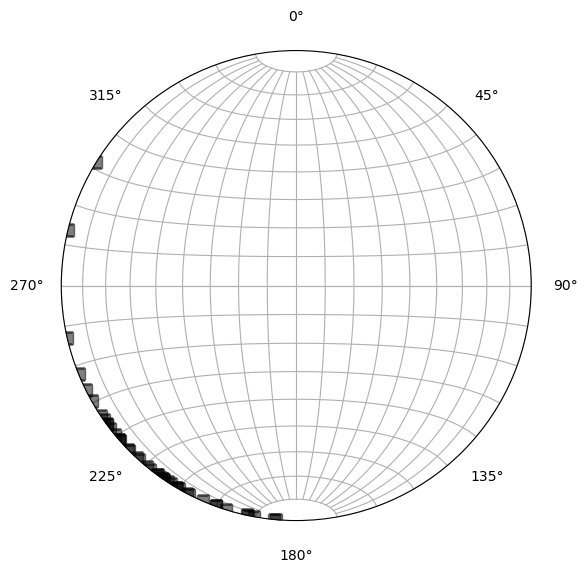

In [18]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='stereonet')

ax.line(np.zeros(len(paleocurrents)), paleocurrents, color='black', markersize=8, alpha=0.5, marker='s', label='corrected paleocurrent')
ax.grid()
fig.tight_layout()
plt.show()

## Make a rose diagram

The data are hard to interpret when they are all plotted up. To more effectively visualize the data, we can make a directional histogram called a rose diagram that bins the data by angle. We will first create the bins and then determine how many vectors are in each bin.

In [19]:
bin_edges = np.arange(0, 370, 10)
number_of_paleocurrents, bin_edges = np.histogram(paleocurrents, bin_edges)

In [12]:
number_of_paleocurrents

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  4,  6, 11,  7,  6,  3,  1,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0])

In [13]:
bin_edges

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360])

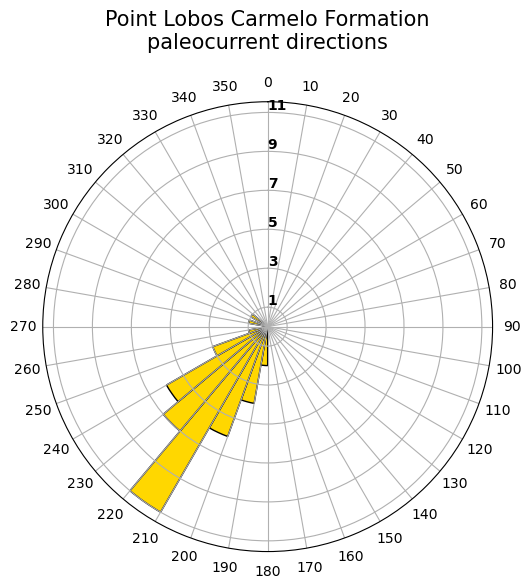

In [15]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1, projection='polar')

ax.bar(np.deg2rad(np.arange(5, 365, 10)), number_of_paleocurrents, 
       width=np.deg2rad(10), bottom=0.0, color='gold', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, number_of_paleocurrents.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Point Lobos Carmelo Formation\npaleocurrent directions', y=1.10, fontsize=15)

fig.tight_layout()
plt.savefig('./paleocurrent_rose.pdf')